In [ ]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Visualization
import ipyleaflet
import matplotlib.pyplot as plt
import seaborn as sns

# Data Science
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.seasonal import seasonal_decompose


# Feature Engineering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.impute import KNNImputer

# Machine Learning

from sklearn.metrics import f1_score, accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#tensor
from keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanAbsoluteError


In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df

,tavg,tmin,tmax,prcp
time,,,,
1990-01-01,23.2,17.0,NaN,0.0
1990-01-02,22.2,16.5,29.9,0.0
1990-01-03,21.8,16.3,30.7,0.0
1990-01-04,25.4,17.9,31.8,0.0
1990-01-05,26.5,19.3,33.7,0.0
...,...,...,...,...
2022-07-21,27.6,25.6,30.5,10.9
2022-07-22,28.3,26.0,30.5,3.0
2022-07-23,28.2,25.8,31.3,5.1


##From here


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Temperature_And_Precipitation_Cities_IN/Mumbai_1990_2022_Santacruz.csv")

df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')
df.set_index('time', inplace=True)

# Assuming your DataFrame is named 'df'
# Remove the first row
df = df.drop(df.index[0])


# Display the modified DataFrame
print(df)


            tavg  tmin  tmax  prcp
time                              
1990-01-02  22.2  16.5  29.9   0.0
1990-01-03  21.8  16.3  30.7   0.0
1990-01-04  25.4  17.9  31.8   0.0
1990-01-05  26.5  19.3  33.7   0.0
1990-01-06  25.1  19.8  33.5   0.0
...          ...   ...   ...   ...
2022-07-21  27.6  25.6  30.5  10.9
2022-07-22  28.3  26.0  30.5   3.0
2022-07-23  28.2  25.8  31.3   5.1
2022-07-24  28.1  25.6  30.4   7.1
2022-07-25  28.3  25.1  30.2   7.1

[11893 rows x 4 columns]


In [ ]:
df_interpolated = df.interpolate(method='time',limit_direction='both')

In [ ]:
df=df_interpolated

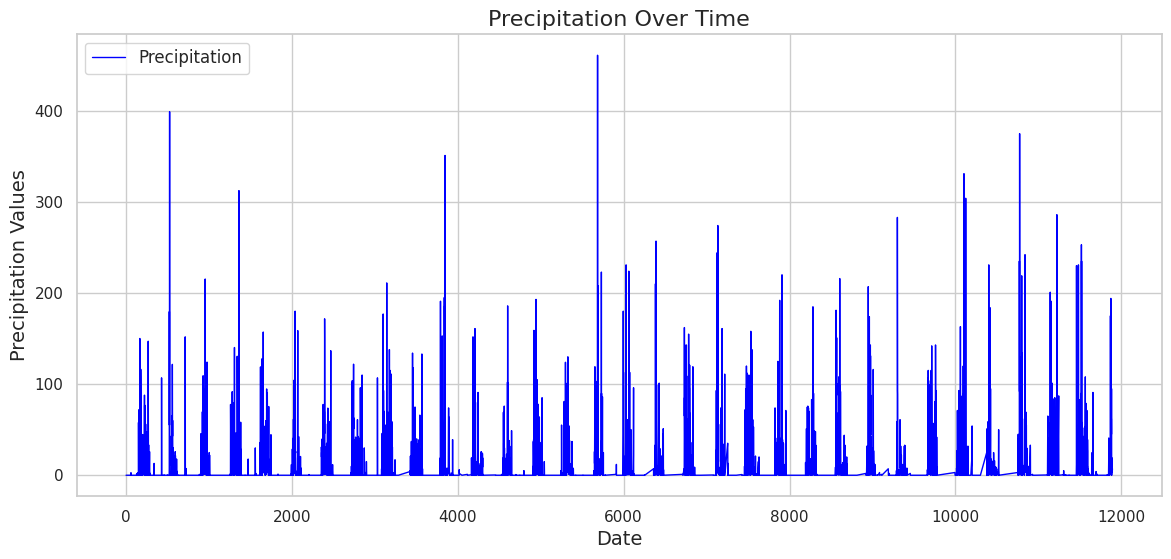

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Create the line plot using Seaborn
plt.figure(figsize=(14, 6))
sns.lineplot(data=df['prcp'], label='Precipitation', color='blue', linewidth=1)

# Title and labels
plt.title('Precipitation Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Precipitation Values', fontsize=14)

# Legend
plt.legend(loc='upper left', fontsize=12)

# Show the plot
plt.show()


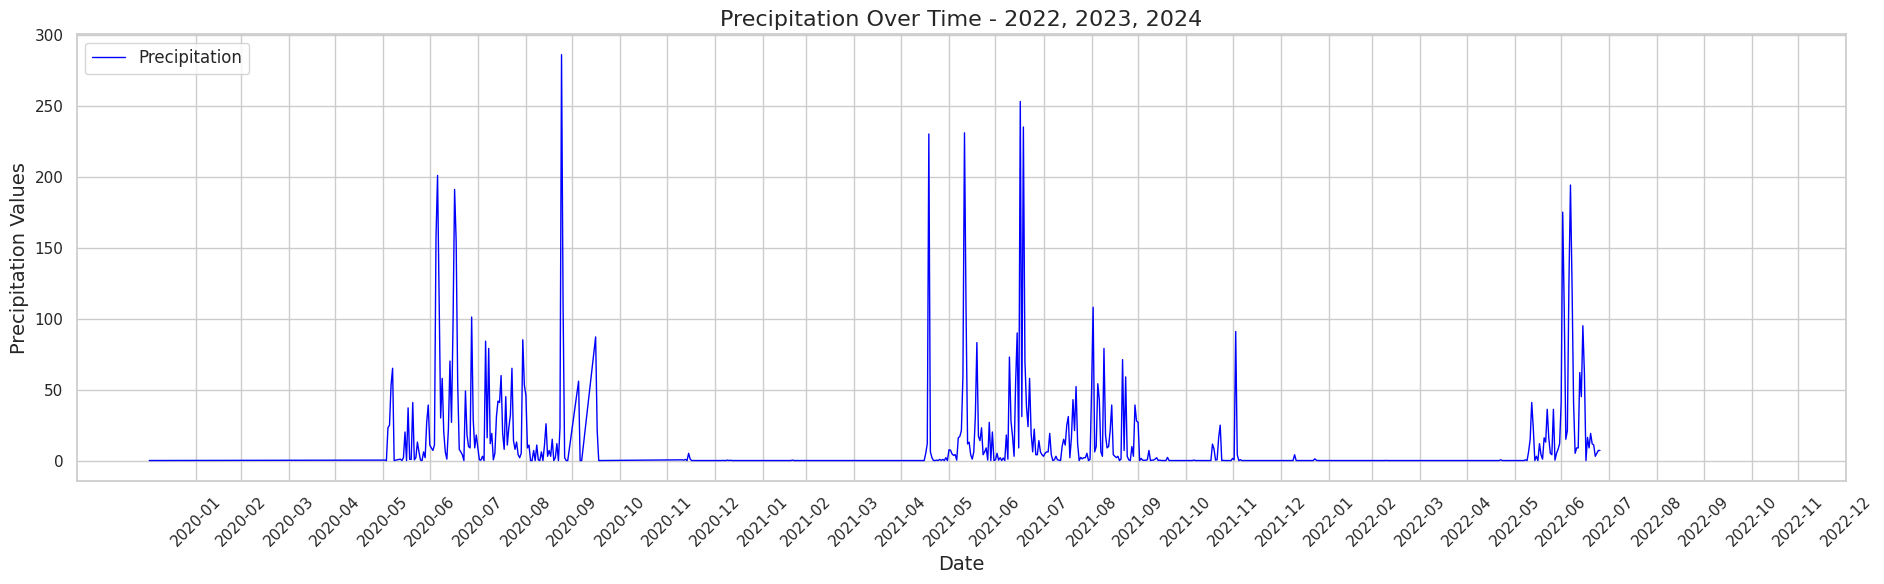

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set the style
sns.set(style="whitegrid")

# Assuming 'time' is the name of your time index column
# Filter the DataFrame to include only the data for the desired years
desired_years = ['2020', '2021', '2022']  # Specify the years you want to visualize
df_years = df[df.index.year.isin(map(int, desired_years))]

# Create the line plot using Seaborn
plt.figure(figsize=(19, 6))  # Increased figure size
sns.lineplot(data=df_years['prcp'], label='Precipitation', color='blue', linewidth=1)

# Title and labels
plt.title('Precipitation Over Time - 2022, 2023, 2024', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Precipitation Values', fontsize=14)

# Adjust x-axis tick frequency
date_range = pd.date_range(start='2020-01-01', end='2022-12-31', freq='1M')  # Adjust the frequency as needed
plt.xticks(ticks=date_range, labels=[date.strftime('%Y-%m') for date in date_range], rotation=45)

# Legend
plt.legend(loc='upper left', fontsize=12)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


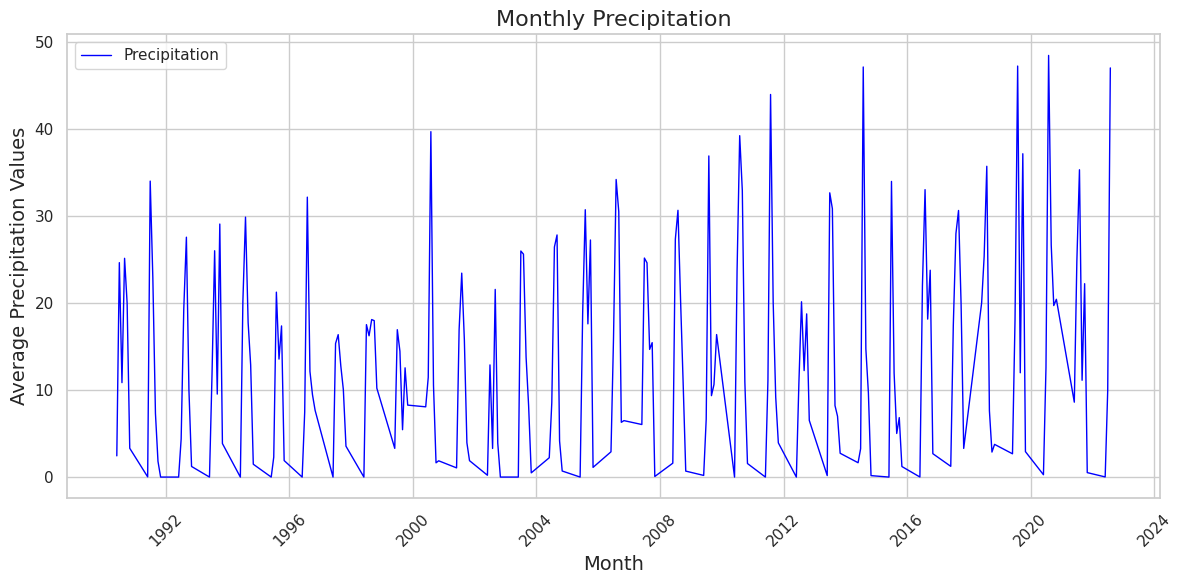

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Resample the filtered DataFrame to monthly frequency and compute the mean
df_monthly = df_filtered.resample('M').mean()

# Create the line plot using Seaborn
plt.figure(figsize=(12, 6))  # Set the figure size
sns.lineplot(data=df_monthly['prcp'], label='Precipitation', color='blue', linewidth=1)

# Title and labels
plt.title('Monthly Precipitation', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Precipitation Values', fontsize=14)

# Set x-axis ticks
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [ ]:
df_filtered = df[(df.index.month >= 5) & (df.index.month <= 10)]
df_filtered

,tavg,tmin,tmax,prcp
time,,,,
1990-05-01,28.6,24.8,32.7,0.0
1990-05-02,28.8,24.4,32.0,0.0
1990-05-03,28.9,25.2,33.1,0.0
1990-05-04,29.2,25.5,32.4,0.0
1990-05-05,29.4,25.5,32.9,0.0
...,...,...,...,...
2022-07-21,27.6,25.6,30.5,10.9
2022-07-22,28.3,26.0,30.5,3.0
2022-07-23,28.2,25.8,31.3,5.1


In [ ]:
result = seasonal_decompose(df_filtered['prcp'], model='additive', period=150)  # Assuming yearly seasonality


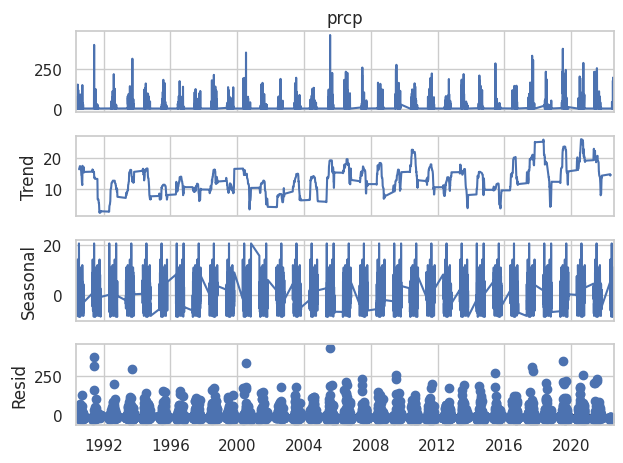

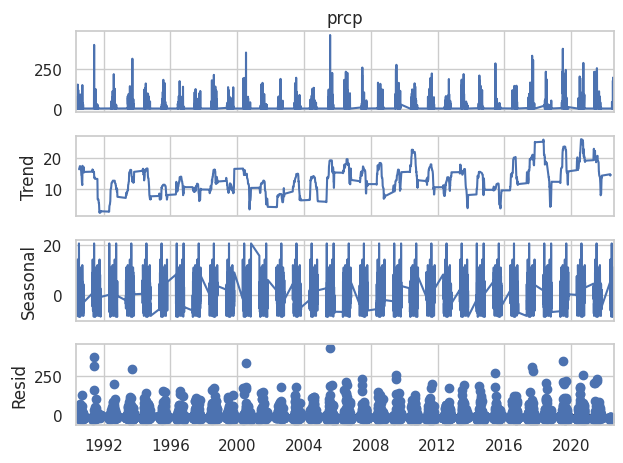

In [ ]:
result.plot()

In [ ]:
df_filtered.drop(columns=['tavg','tmin','tmax'], inplace=True)

In [ ]:
df=df_filtered

In [ ]:

train = df.iloc[:4500]
test = df.iloc[4500:]


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


train.shape

(4500, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:

train

,prcp
time,
1990-05-01,0.0
1990-05-02,0.0
1990-05-03,0.0
1990-05-04,0.0
1990-05-05,0.0
...,...
2014-07-19,9.9
2014-07-20,3.0
2014-07-21,7.1


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming 'df' is your DataFrame with time series data
# Ensure 'prcp' is the column containing precipitation values

# Prepare the data
data = df['prcp'].values.reshape(-1, 1)  # Reshape for MinMaxScaler

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data_scaled) * 0.8)  # 80% for training
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

# Define a function to create input sequences for the RNN
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Set sequence length (number of time steps to look back)
seq_length = 5  # Adjust as needed

# Create input sequences for the RNN
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Build the RNN model
model = Sequential([
    LSTM(units=10, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.5),
      # Add dropout layer after the first LSTM layer
    LSTM(units=15,activation='relu', return_sequences=False),  # No return sequences for the last LSTM layer
    Dropout(0.5),
    Dense(units=1,activation='relu')
    ])

# Train the model
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Make forecasts
forecasts = model.predict(X_test)

# Inverse transform the forecasts
forecasts_inv = scaler.inverse_transform(forecasts)

# Optionally, visualize forecasts and compare with actual data


Epoch 1/100
75/75 [==============================] - 7s 28ms/step - loss: 0.0044 - val_loss: 0.0069
Epoch 2/100
75/75 [==============================] - 1s 17ms/step - loss: 0.0043 - val_loss: 0.0069
Epoch 3/100
75/75 [==============================] - 1s 19ms/step - loss: 0.0042 - val_loss: 0.0065
Epoch 4/100
75/75 [==============================] - 2s 29ms/step - loss: 0.0042 - val_loss: 0.0066
Epoch 5/100
75/75 [==============================] - 2s 24ms/step - loss: 0.0041 - val_loss: 0.0064
Epoch 6/100
75/75 [==============================] - 1s 17ms/step - loss: 0.0041 - val_loss: 0.0065
Epoch 7/100
75/75 [==============================] - 1s 17ms/step - loss: 0.0041 - val_loss: 0.0062
Epoch 8/100
75/75 [==============================] - 1s 17ms/step - loss: 0.0040 - val_loss: 0.0062
Epoch 9/100
75/75 [==============================] - 1s 17ms/step - loss: 0.0041 - val_loss: 0.0063
Epoch 10/100
75/75 [==============================] - 1s 17ms/step - loss: 0.0040 - val_loss: 0.0062

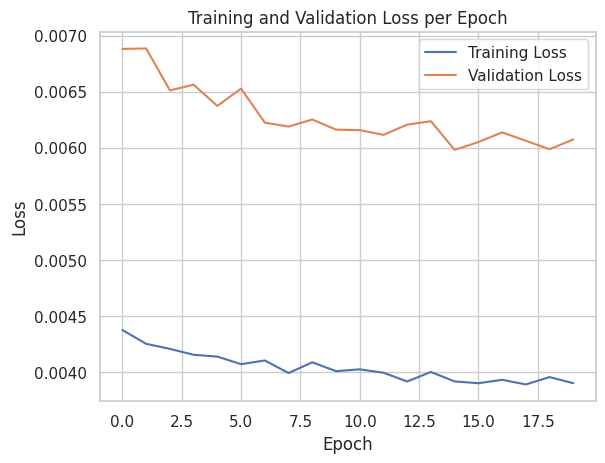

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss per epoch
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


RMSE: 35.6533378903938


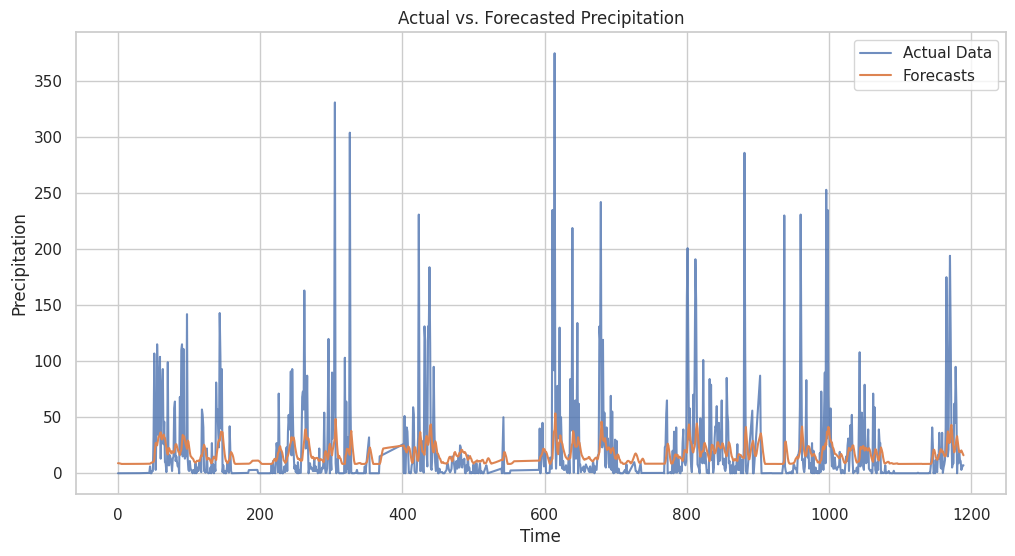

In [ ]:
from sklearn.metrics import mean_squared_error
import math

# Inverse transform the forecasts and actual test data
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(y_test_inv, forecasts_inv))
print(f'RMSE: {rmse}')

# Visualize forecasts and actual data
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual Data', alpha=0.8)
plt.plot(forecasts_inv, label='Forecasts')
plt.title('Actual vs. Forecasted Precipitation')
plt.xlabel('Time')
plt.ylabel('Precipitation')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assuming 'df' is your DataFrame with time series data
# Ensure 'prcp' is the column containing precipitation values

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)  # 80% for training
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Fit the exponential smoothing model
exp_smoothing_model = ExponentialSmoothing(train_data['prcp'], trend=None, seasonal='add', seasonal_periods=150)
exp_smoothing_result = exp_smoothing_model.fit()

# Make forecasts
forecast_length = len(test_data)
forecasts = exp_smoothing_result.forecast(forecast_length)

# Visualize forecasts and actual data
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['prcp'], label='Training Data')
plt.plot(test_data.index, test_data['prcp'], label='Actual Data')
plt.plot(test_data.index, forecasts, label='Exponential Smoothing Forecast')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.legend()
plt.show()


NameError: name 'df' is not defined

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(test_data['prcp'], forecasts))

print('RMSE:', rmse)


RMSE: 8.917414656834707


In [ ]:
for stock_df in stock_dfs:
    stock_df["Daily Return"] = stock_df["Close"].pct_change() * 100